### Description: Predicting Ethereum Price with Python and Machine Learning using Scikit-learn and Support Vector Regression

In [1]:
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
# RegEx: Regular expression

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')






In [2]:
import pandas as pd
df = pd.read_csv('ethereum_2015-08-07_2024-06-02.csv')
df = df.set_index(pd.DatetimeIndex(df['Start'].values))
display(df)





,Start,End,Open,High,Low,Close,Volume,Market Cap
2024-06-01,2024-06-01,2024-06-02,2948.742856,2978.306538,2941.392797,2971.467374,1.519628e+10,3.558701e+11
2024-05-31,2024-05-31,2024-06-01,2940.157084,2992.084249,2925.939443,2947.755919,1.673715e+10,3.544224e+11
2024-05-30,2024-05-30,2024-05-31,2953.729354,2981.526565,2913.709414,2940.947921,1.754862e+10,3.542934e+11
2024-05-29,2024-05-29,2024-05-30,3000.900270,3021.146455,2938.025184,2951.882733,1.889175e+10,3.575360e+11
2024-05-28,2024-05-28,2024-05-29,3028.869403,3045.442442,2962.778842,3000.077482,1.966750e+10,3.614046e+11
...,...,...,...,...,...,...,...,...
2015-08-12,2015-08-12,2015-08-13,0.838300,1.012639,0.693657,0.971606,1.547950e+06,5.246035e+07
2015-08-11,2015-08-11,2015-08-12,0.556151,0.888188,0.520658,0.830301,5.029142e+05,3.743174e+07
2015-08-10,2015-08-10,2015-08-11,0.551009,0.572956,0.499706,0.555567,3.593449e+05,3.283582e+07
2015-08-09,2015-08-09,2015-08-10,0.591381,0.690675,0.493933,0.572558,5.493833e+05,3.262780e+07


In [3]:
future_days = 10

#Create a new column (target) shifted 'x' units/days up
df[str(future_days) + '_Day_Price_Forecast'] = df [['Close']].shift(-future_days)
#Show the data
display(df[['Close', str(future_days)+'_Day_Price_Forecast']])

,Close,10_Day_Price_Forecast
2024-06-01,2971.467374,2936.321752
2024-05-31,2947.755919,2970.524163
2024-05-30,2940.947921,2869.336887
2024-05-29,2951.882733,2415.723011
2024-05-28,3000.077482,2452.934356
...,...,...
2015-08-12,0.971606,NaN
2015-08-11,0.830301,NaN
2015-08-10,0.555567,NaN
2015-08-09,0.572558,NaN


In [4]:

x = np.array(df[['Close']])
x = x[:df.shape[0]-future_days]
print(x)


[[2.97146737e+03]
 [2.94775592e+03]
 [2.94094792e+03]
 ...
 [1.15041920e+00]
 [9.82203416e-01]
 [8.59668404e-01]]


In [5]:
y = np.array(df[[str(future_days)+'_Day_Price_Forecast']])
y = y[:-future_days]
print(y)


[[2.93632175e+03]
 [2.97052416e+03]
 [2.86933689e+03]
 ...
 [5.55566633e-01]
 [5.72557778e-01]
 [5.61197639e-01]]


In [6]:
#split the data into training and testing
from sklearn.model_selection import train_test_split    
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [7]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(x_train, y_train)

c:\Users\Student\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000.0, gamma=1e-05)

In [8]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr_rbf accuracy:', svr_rbf_confidence)

svr_rbf accuracy: 0.9626574760602388


In [9]:
svm_predict = svr_rbf.predict(x_test)
print(svm_predict)

[8.51829529e+00 3.81301442e+02 1.23290897e+03 9.95635012e+01
 1.68620889e+02 8.34880485e+00 1.04047698e+02 3.34059130e+02
 1.03128541e+02 1.42727539e+02 9.42061354e-01 9.28759746e+01
 1.47991441e+03 3.21154765e+02 1.21400100e+03 8.37933949e+00
 9.61684859e-01 1.13081108e+03 1.00712348e+03 2.83762282e+02
 2.50109946e+03 7.72678479e+00 1.75035385e+02 9.26512316e+00
 6.58793657e+00 1.29136251e+03 2.57108030e+03 1.90062734e+03
 3.56212676e+02 2.57256374e+03 7.86611383e+00 1.30822719e+03
 2.55007064e+03 3.44851971e+02 9.18066752e+00 1.98169569e+00
 1.04775530e+03 2.96991941e+02 6.79800498e+02 1.28736976e+03
 9.09536599e+01 1.66170557e+03 1.03490278e+03 2.70840079e+03
 2.50937220e+03 9.67468525e-01 1.02159641e+03 7.91481253e+00
 1.39180683e+03 1.25052441e+03 1.03809816e+02 1.20205509e+03
 2.15243311e+02 7.63751414e+02 1.20426922e+02 1.29493586e+03
 1.01524602e+00 1.12245626e+02 1.80092221e+02 2.26224778e+02
 1.66145569e+03 1.44681626e+03 1.39408914e+03 1.64124288e+03
 2.92939029e+02 1.446200

In [10]:
print(y_test)

[[1.03312033e+01]
 [4.71728262e+02]
 [9.69921772e+02]
 [1.00506004e+02]
 [1.78883610e+02]
 [9.50998556e+00]
 [1.66375828e+02]
 [3.90874377e+02]
 [1.52798099e+02]
 [1.35786967e+02]
 [1.04779250e+00]
 [1.01044313e+02]
 [1.36767089e+03]
 [3.59341330e+02]
 [1.28683508e+03]
 [9.16543679e+00]
 [6.77456352e-01]
 [1.28236324e+03]
 [8.91094643e+02]
 [2.33606261e+02]
 [2.85679667e+03]
 [9.08583496e+00]
 [1.65154179e+02]
 [1.04181844e+01]
 [6.93376719e+00]
 [1.27370046e+03]
 [2.53807283e+03]
 [2.64892278e+03]
 [3.88007479e+02]
 [2.41524858e+03]
 [8.66411794e+00]
 [1.31334045e+03]
 [2.01974715e+03]
 [4.34495741e+02]
 [8.43638134e+00]
 [1.68653049e+00]
 [1.09706380e+03]
 [2.76546033e+02]
 [7.46363930e+02]
 [1.27262294e+03]
 [7.41287580e+01]
 [1.62888589e+03]
 [1.05144380e+03]
 [2.30803586e+03]
 [2.05985054e+03]
 [1.06091817e+00]
 [1.01652859e+03]
 [9.52081894e+00]
 [1.23137843e+03]
 [1.03075597e+03]
 [1.75957722e+02]
 [1.06904462e+03]
 [2.21920969e+02]
 [6.90990825e+02]
 [1.12388315e+02]
 [1.358595

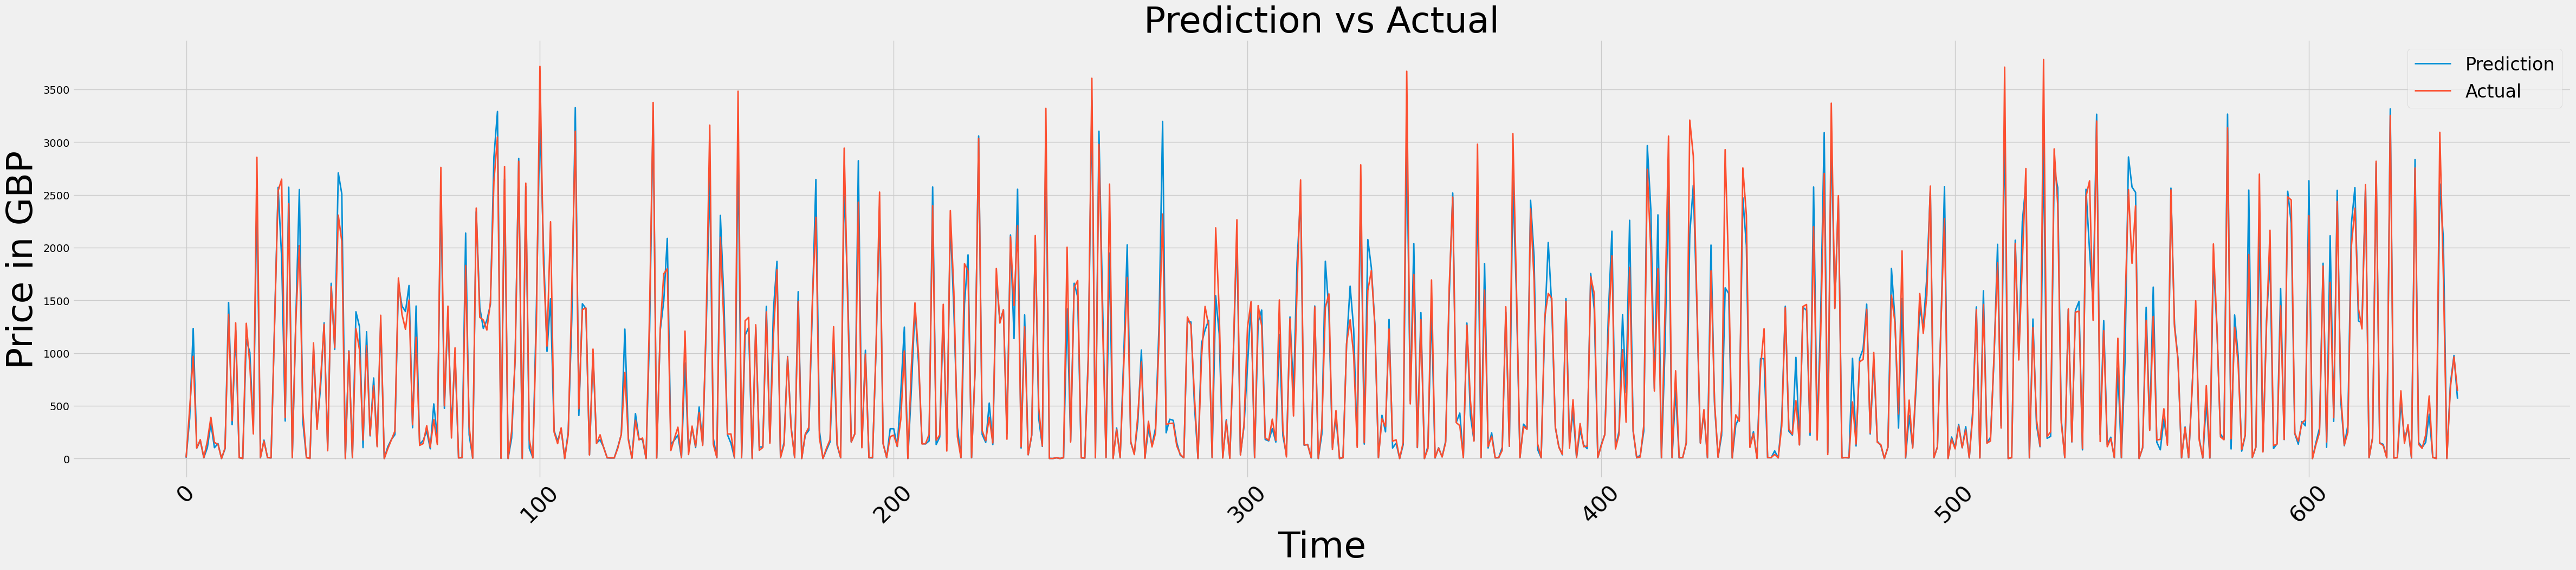

In [42]:
plt.figure(figsize=(53,10))
plt.plot(svm_predict, label ='Prediction', lw=2, alpha=1.0)
plt.plot(y_test, label ='Actual', lw=2, alpha=1.0)
plt.title('Prediction vs Actual',fontsize=48)
plt.ylabel('Price in GBP',fontsize=48)
plt.xlabel('Time',fontsize=48)
plt.legend()
plt.legend(fontsize=24)
plt.xticks(rotation=45,fontsize=30)
plt.show()